# 1. 비지도 학습 종류

- 비지도 변환: 차원 축소
- 군집: 비슷한 것끼리 그룹화

# 2. 비지도 학습 도전 과제

비지도 학습의 어려운 점은 평가가 어렵다는 것이다. 이런 이유로 비지도 학습은 데이터 를 잘 이해하고 싶을 떄 탐색적 분석 단계에서 많이 사용한다. 비지도 학습은 전처리 단계에서도 사용한다. 비지도 학습은 지도 학습의 전처리 단계에서도 사용한다. 비지도 학습의 결과로 새롭게 표현된 데이터를 학습하면 지도 학습의 정확도가 높아지기도 하며 메모리와 시간을 절약할 수 있다.

# 3. 데이터 전처리와 스케일 조정

In [1]:
import mglearn

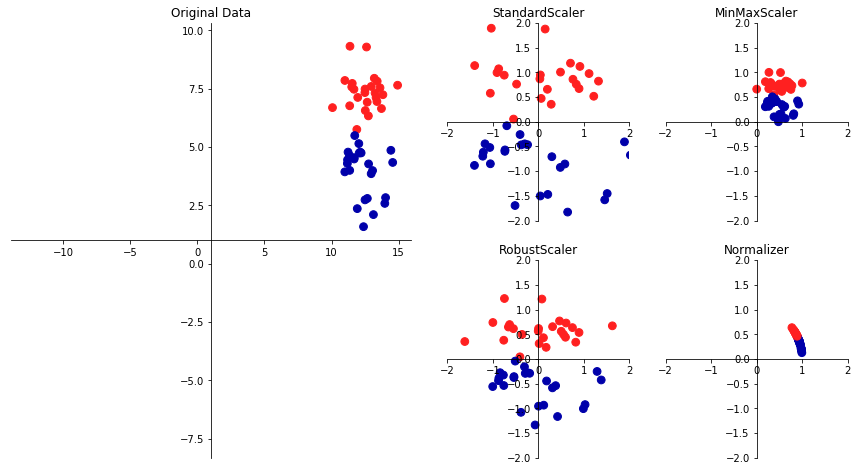

In [3]:
mglearn.plots.plot_scaling()

## 전처리 방법 4가지



1. Standard Scaler - 평균과 분산을 1로 맞춤
2. Robust Scaler - 중간 값과 사분위 수를 사용(이상치에 영향 덜 받음)
3. Min Max Scaler - 모든 특성이 정확하게 0과 1 사이에 위치
4. Normalizer - 매우 다른 스케일 조정 기법

## 실제 데이터에 적용하기

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
%precision 

'%.2f'

In [26]:
import numpy as np
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [27]:
# train 데이터 transform
X_train_scaled = scaler.transform(X_train)

# 스케일 조정된 후 데이터 속성 출력
print("스케일 조정 전 특성 별 최소값: \n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성 별 최대값: \n {}".format(X_train.max(axis=0)))

print("스케일 조정 후 특성 별 최소값: \n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성 별 최대값: \n {}".format(X_train_scaled.max(axis=0)))

스케일 조정 전 특성 별 최소값: 
 [6.98 9.71 43.79 143.50 0.05 0.02 0.00 0.00 0.11 0.05 0.12 0.36 0.76 6.80
 0.00 0.00 0.00 0.00 0.01 0.00 7.93 12.02 50.41 185.20 0.07 0.03 0.00 0.00
 0.16 0.06]
스케일 조정 전 특성 별 최대값: 
 [28.11 39.28 188.50 2501.00 0.16 0.29 0.43 0.20 0.30 0.10 2.87 4.88 21.98
 542.20 0.03 0.14 0.40 0.05 0.06 0.03 36.04 49.54 251.20 4254.00 0.22 0.94
 1.17 0.29 0.58 0.15]
스케일 조정 후 특성 별 최소값: 
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00]
스케일 조정 후 특성 별 최대값: 
 [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00
 1.00 1.00]


In [28]:
# 테스트 데이터
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성 별 최소값: \n {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성 별 최대값: \n {}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성 별 최소값: 
 [0.03 0.02 0.03 0.01 0.14 0.04 0.00 0.00 0.15 -0.01 -0.00 0.01 0.00 0.00
 0.04 0.01 0.00 0.00 -0.03 0.01 0.03 0.06 0.02 0.01 0.11 0.03 0.00 0.00
 -0.00 -0.00]
스케일 조정 후 특성 별 최대값: 
 [0.96 0.82 0.96 0.89 0.81 1.22 0.88 0.93 0.93 1.04 0.43 0.50 0.44 0.28
 0.49 0.74 0.77 0.63 1.34 0.39 0.90 0.79 0.85 0.74 0.92 1.13 1.07 0.92
 1.21 1.63]


- fit_transform 가능하다.

### 지도 학습에서 데이터 전처리 효과

In [29]:
from sklearn.svm import SVC

In [31]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

test set accuracy: 0.63


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
print("스케일 조정된 테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트 정확도: 0.97
